# Exponential Growth Model
### N = number of cases on a given day
### E = average number of people one infected person is exposed to in one day
### p = probability of each exposure becoming an infection
### ∆N = E*p*N, where E*p = R which is the growth factor = (daily new cases)/(previous daily new cases)
### *a ratio between two successive changes*
### So we can set the equation: N(t) = R*N0^t, where N0 is the initial value and t is the number of days since the outbreak
### but since we want to include the people already infected, we should use logistic Model
### so we'll get dN/dt = c(1-(N(t)/P))*N(t)

# Growth Factor

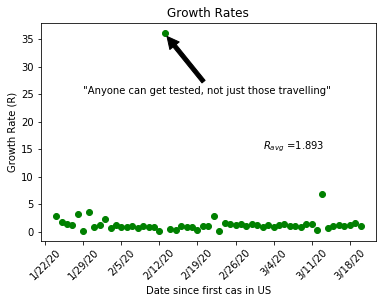

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

try:
    confirmed_df = pd.read_csv(
        'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
except IOError:
    print("Dataset not available, please clone repo listed in README")
    exit()

# Dropping all columns except dates
df_world = confirmed_df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])

# summing data for each date
world_column_totals = df_world.sum()

#creating a new pandas DataFrame with World totals
world_frame = {'World Total':world_column_totals}
df_world = pd.DataFrame(world_frame)
df_world['diff'] = df_world['World Total'].diff()
df_world['shift'] = df_world['diff'].shift(1)
df_world['R'] = df_world['diff']/df_world['shift']
average_growth_rate = np.nanmean(df_world['R'])
R_avg = round(average_growth_rate, 3)
# print(average_growth_rate)
fig = plt.figure()
plt.title('Growth Rates')
plt.xticks(np.arange(0,len(df_world),step=7), rotation=45)
plt.xlabel('Date since first cas in US')
plt.ylabel('Growth Rate (R)')
plt.text(40,15,'$R_{avg}$ =' + str(R_avg))
plt.annotate('"Anyone can get tested, not just those travelling"',xy=(22,36), xytext=(7,25),\
                arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot(df_world['R'], 'go')
plt.show()